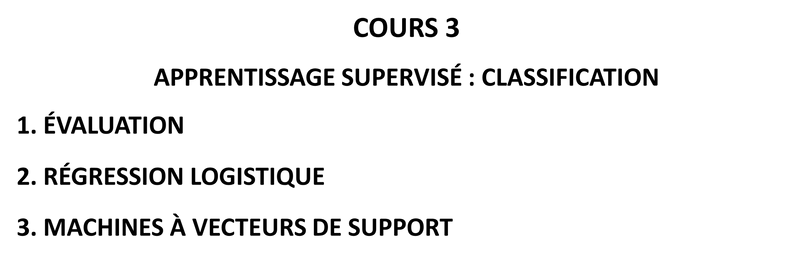

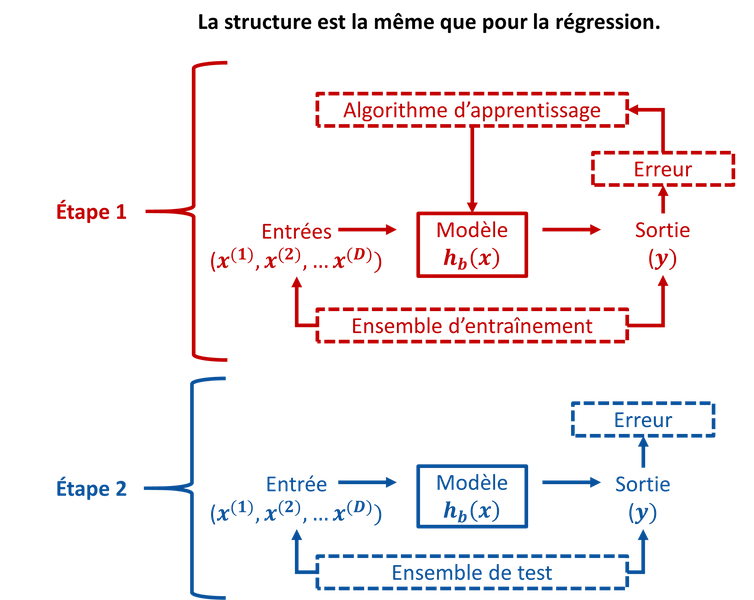

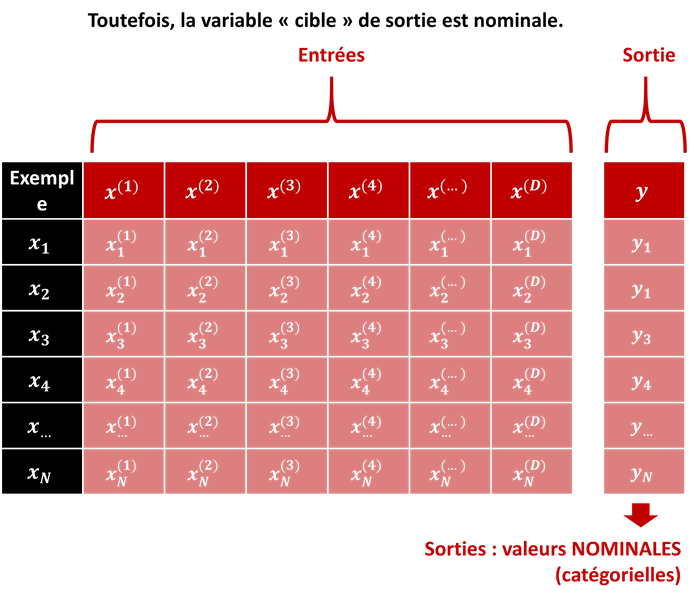

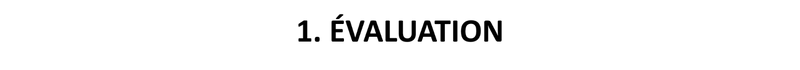

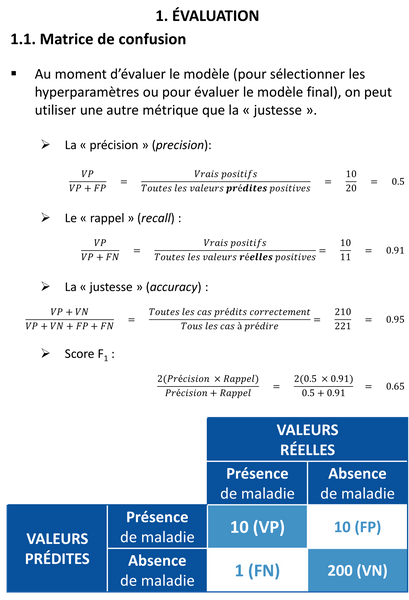

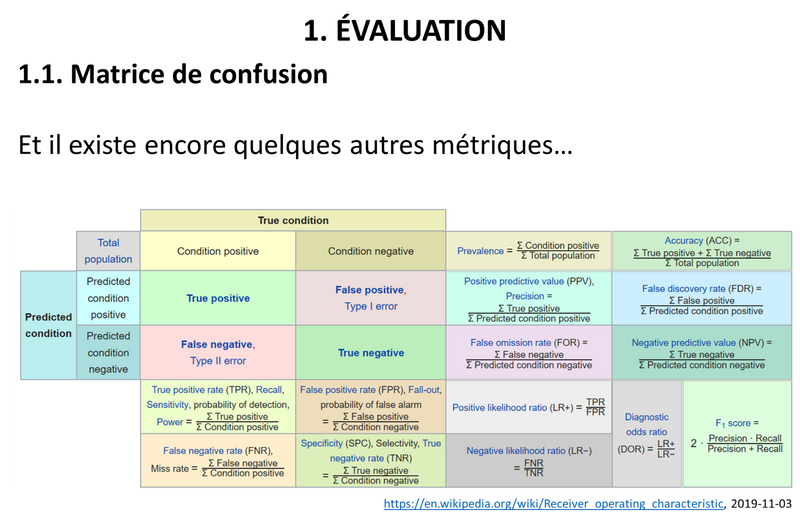

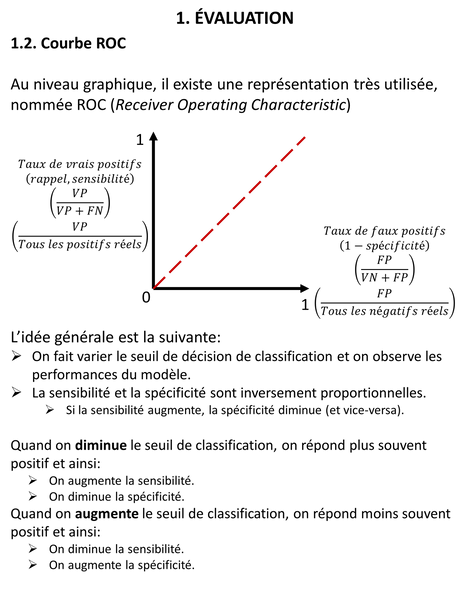

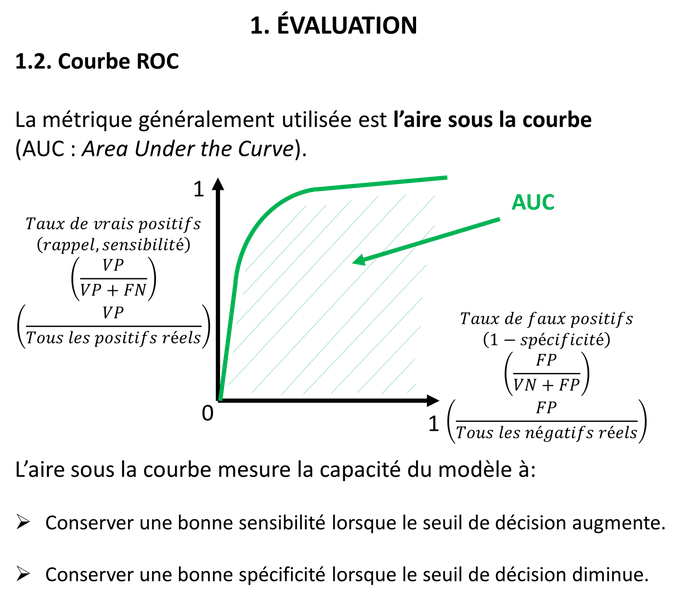

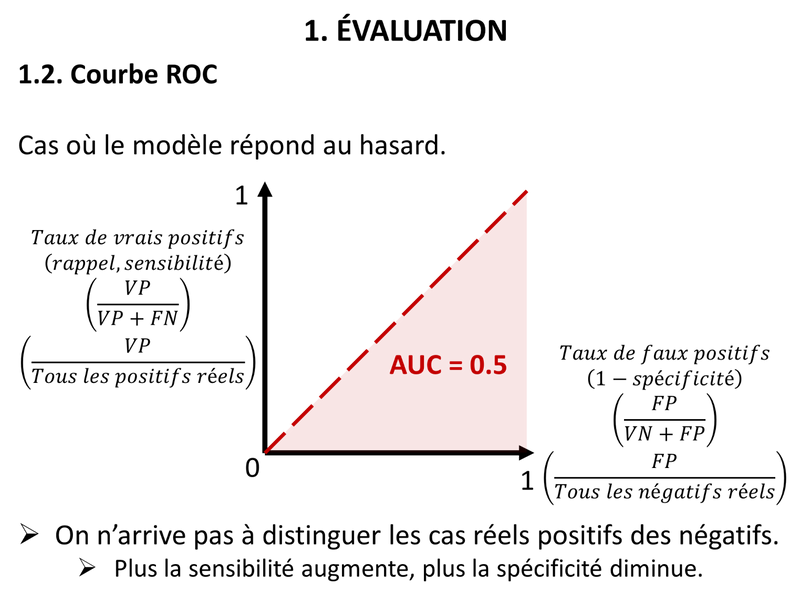

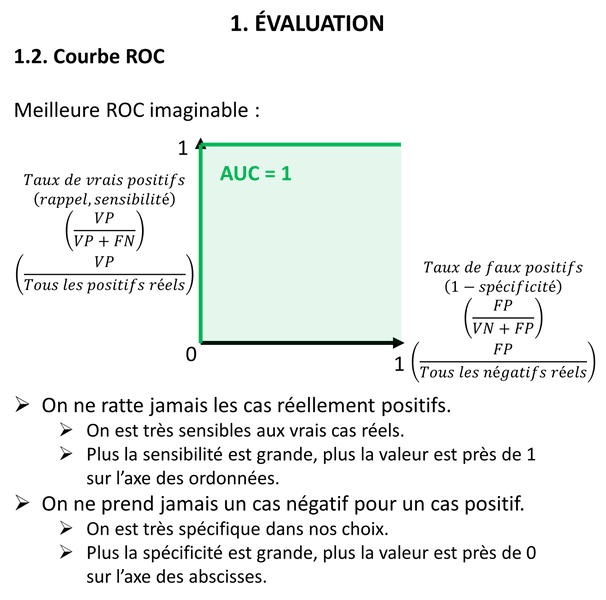

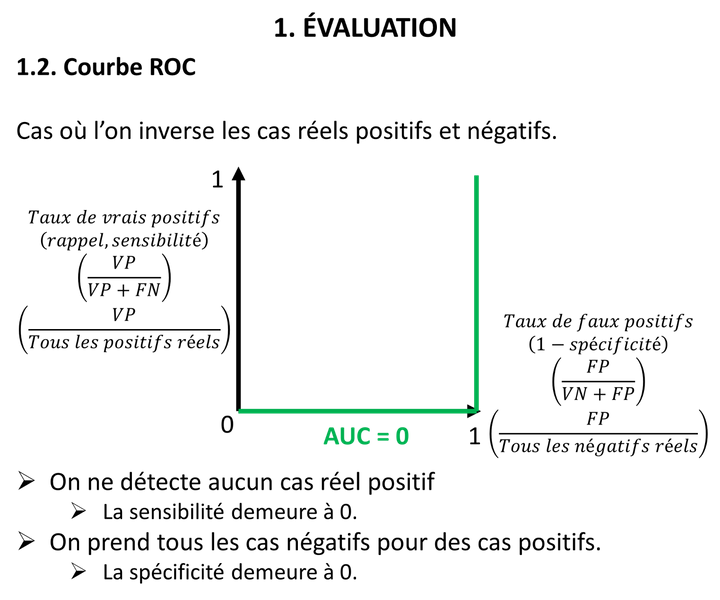

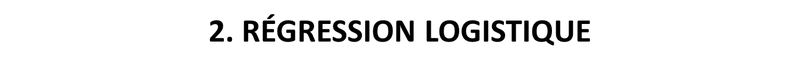

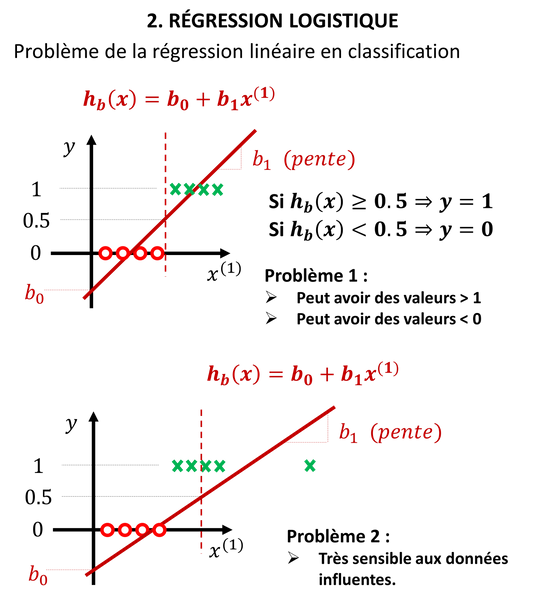

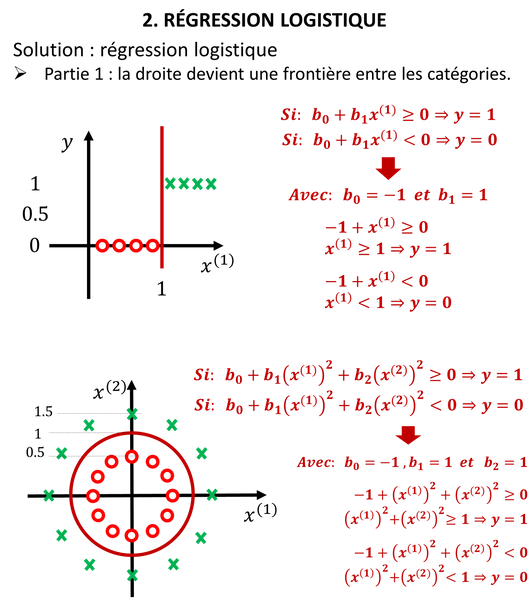

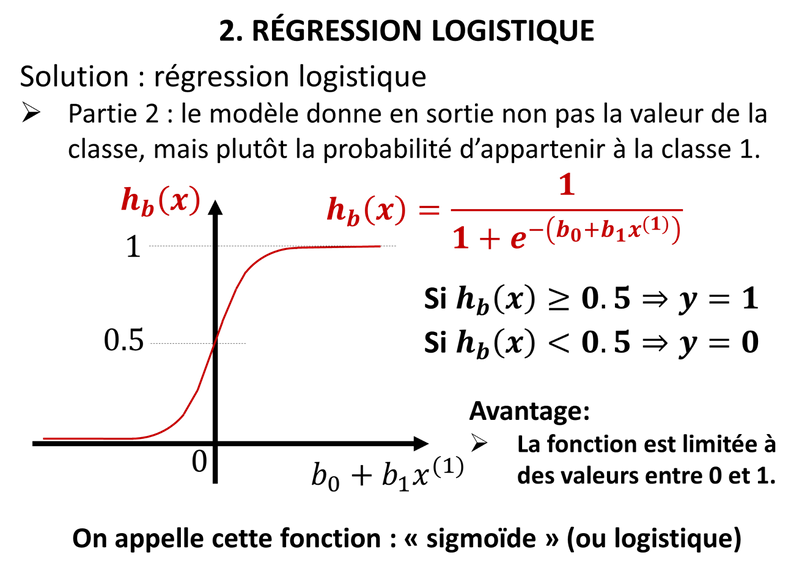

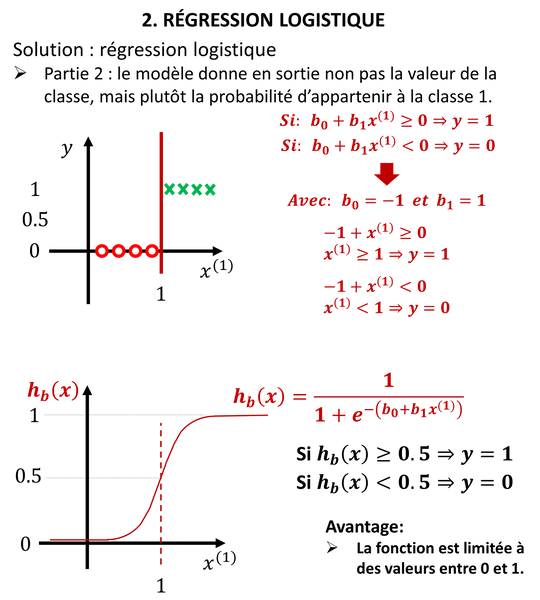

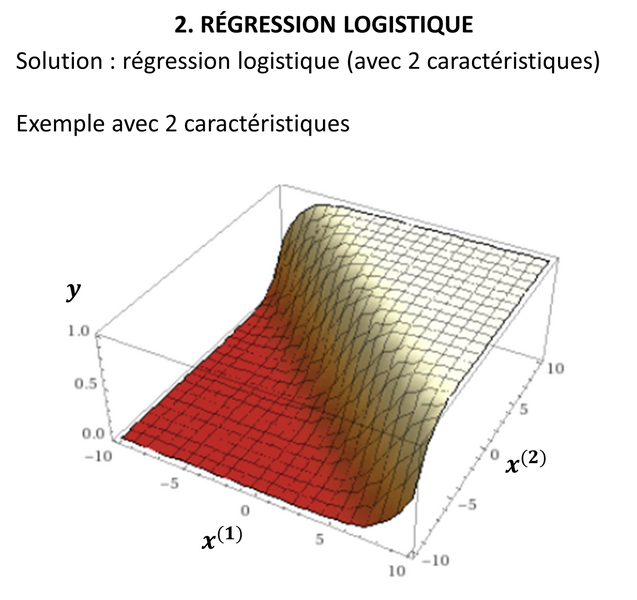

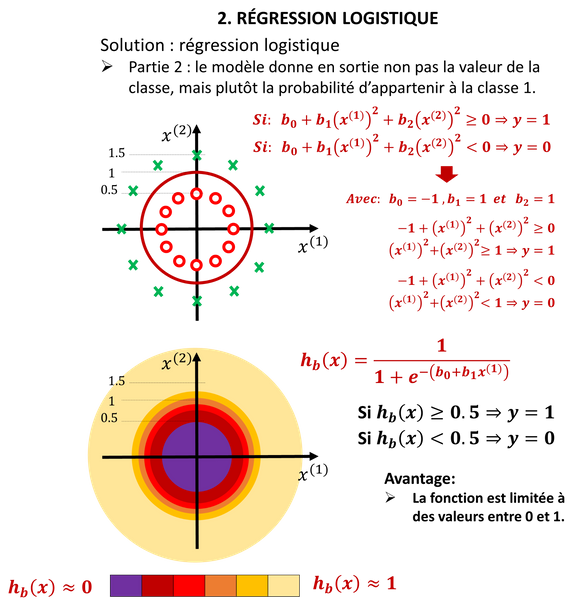

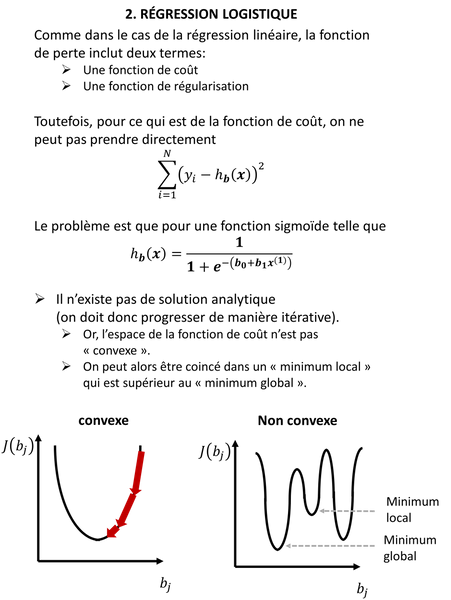

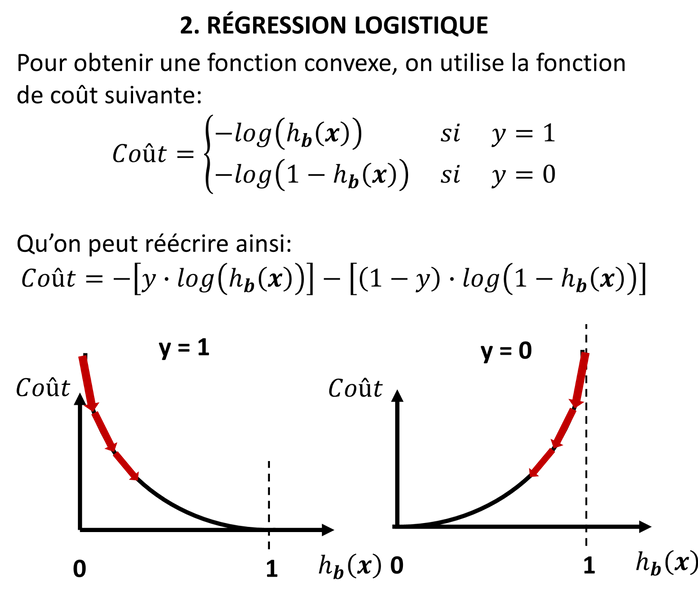

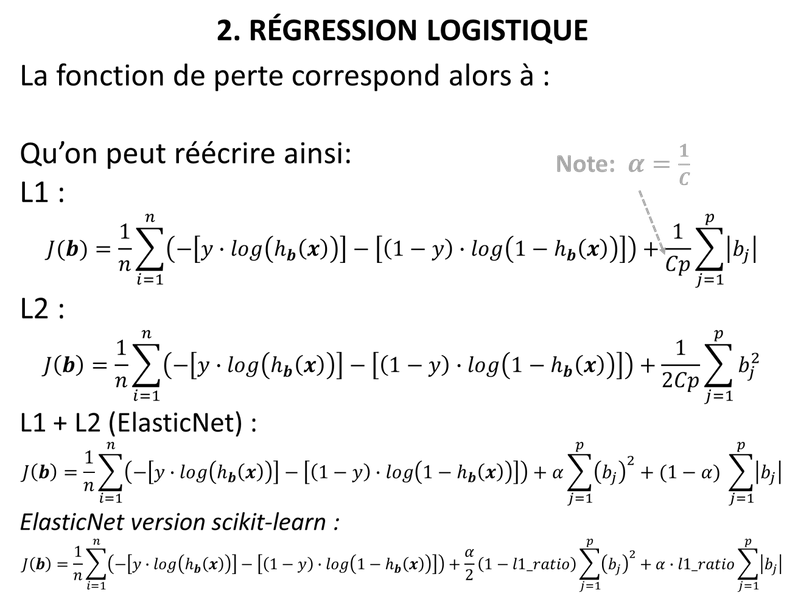

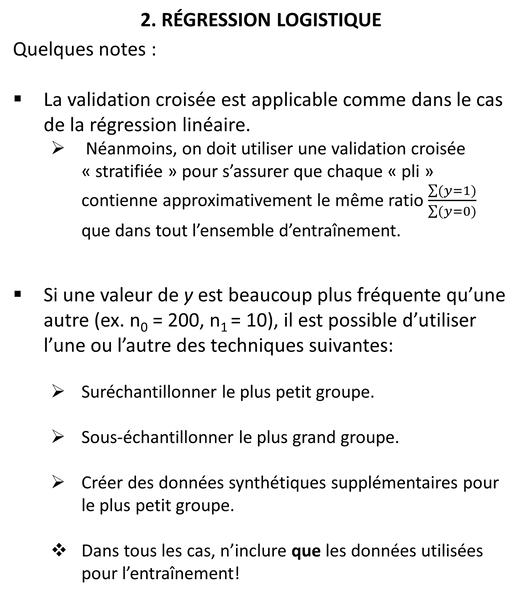

### ***FAISONS UN EXEMPLE***

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.linear_model import LogisticRegression

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = LogisticRegression()

# Définir les hyperparamètres
hyperparams = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'C': 0.1}

Score = 
 0.7248212299380264


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

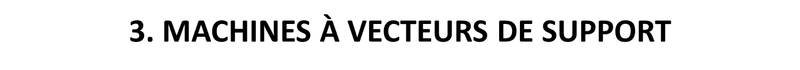

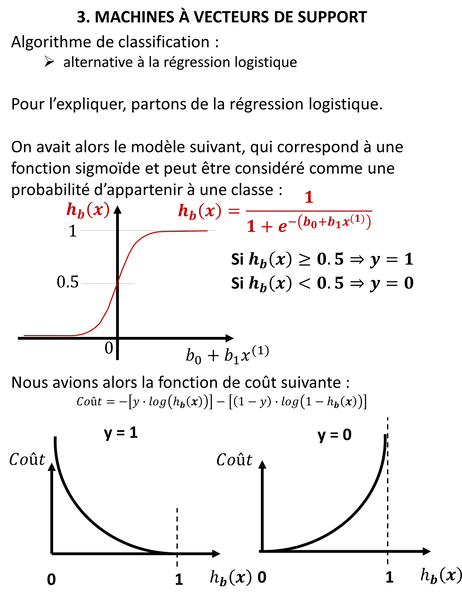

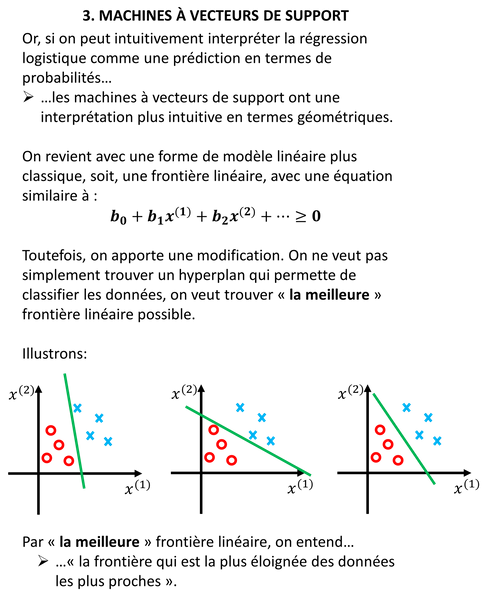

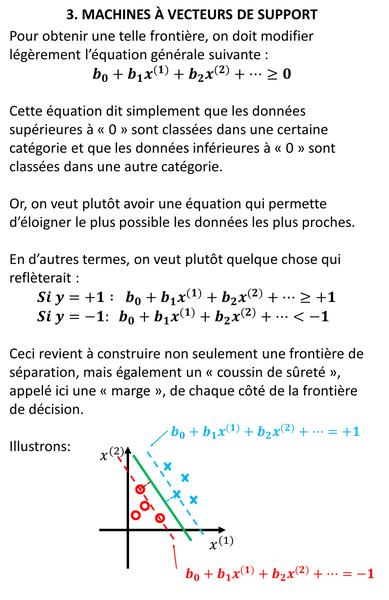

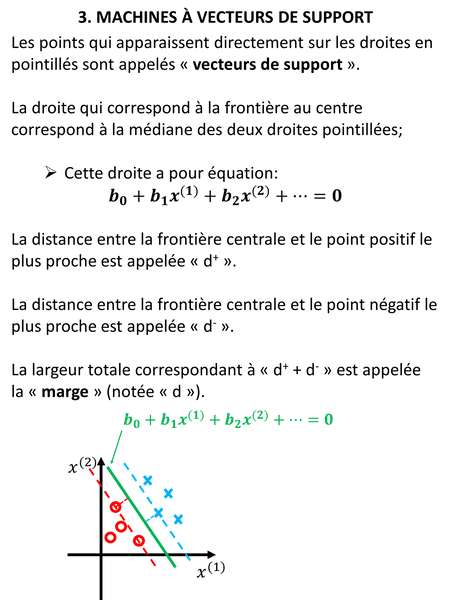

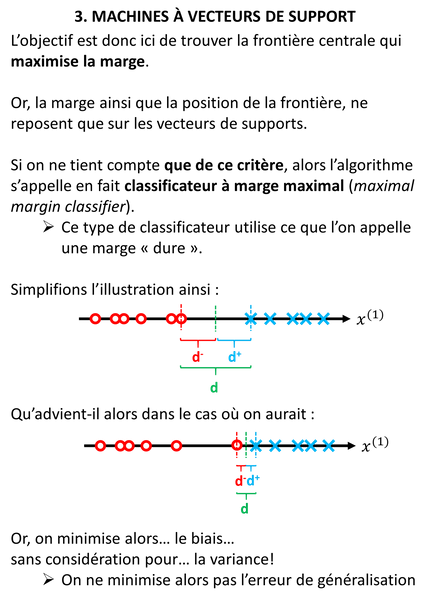

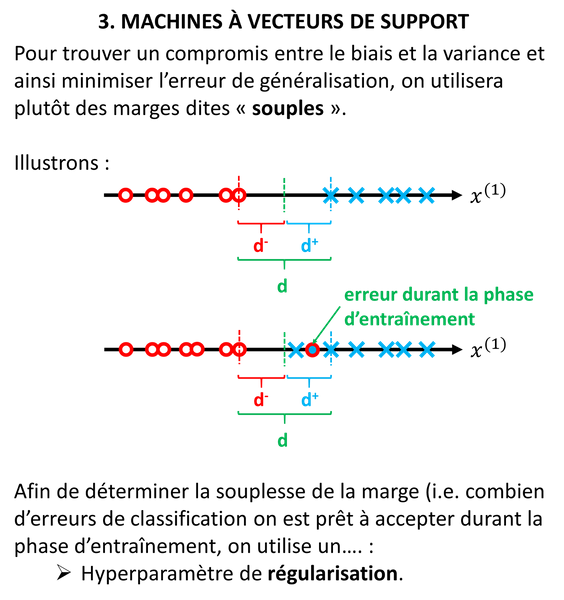

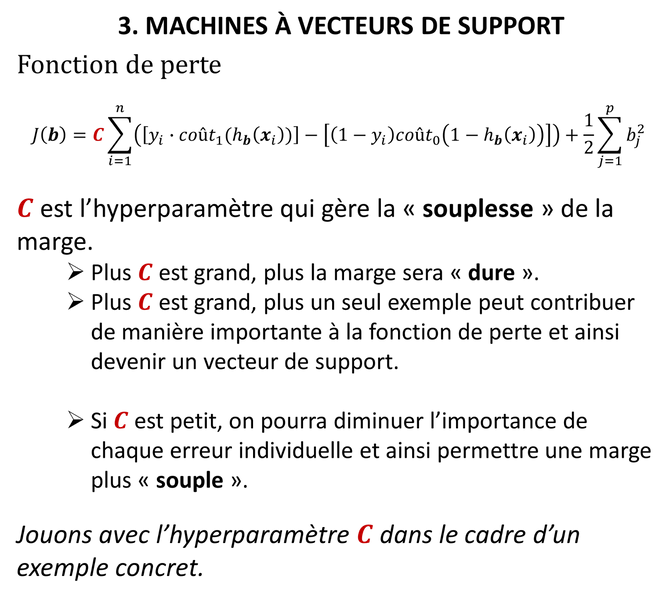

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import svm

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = svm.SVC(kernel='linear')

# Définir les hyperparamètres
hyperparams = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'C': 0.0001}

Score = 
 0.721579532814238


SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [3]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.5


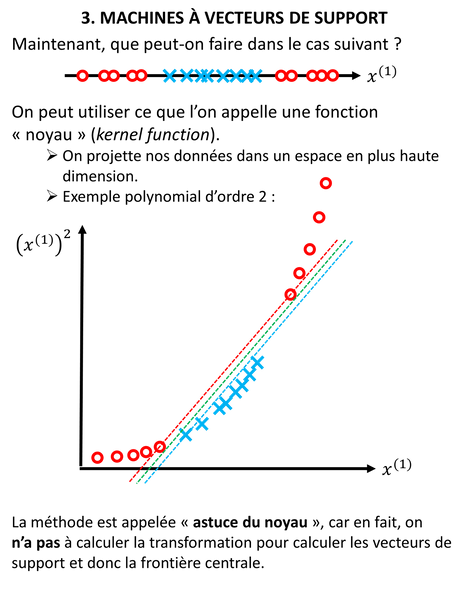

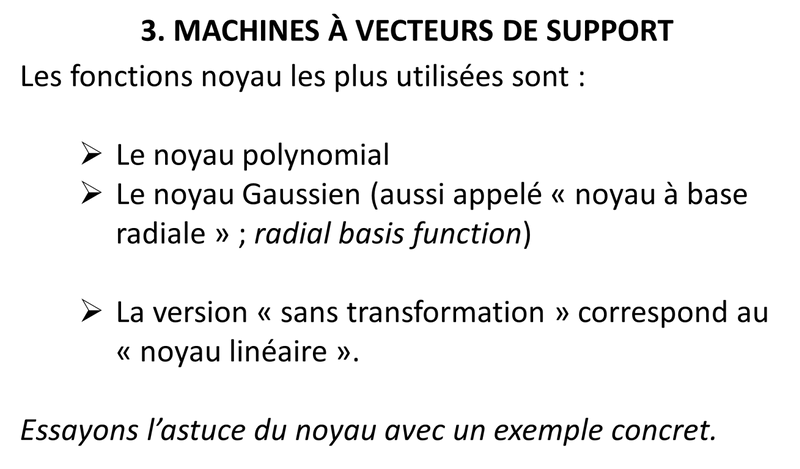

In [4]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import svm

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = svm.SVC(kernel='rbf')

# Définir les hyperparamètres
hyperparams = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000], 'gamma':[.0001, .001, .01, .1, 1, 10, 100, 1000]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'C': 10, 'gamma': 0.01}

Score = 
 0.7313840775464803


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.6406025824964132
